In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from pandas.plotting import parallel_coordinates
from collections import Counter
%matplotlib inline

sns.set_style("darkgrid")
import numpy as np

from statsmodels.graphics.mosaicplot import mosaic

In [2]:
headings = ["age", "workclass", "fnlwgt", "education", "education-num", "marital_status", "occupation", \
            "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country",\
            "salary-range"]
df = pd.read_csv("./data/adult.data", names=headings)

df['salary-range'] = df['salary-range'].apply(lambda e: e.strip())
df['native-country'] = df['native-country'].apply(lambda e: e.strip())


df['salary-range-bool'] = df['salary-range'] == ">50K"

df['salary-range-int'] = df['salary-range-bool'].apply(lambda x: 1 if x else 0)

df.head(30)

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-range,salary-range-bool,salary-range-int
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,False,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,False,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,False,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,True,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,True,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,True,1


In [3]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary-range-int
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [4]:
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
education            object
education-num         int64
marital_status       object
occupation           object
relationship         object
race                 object
sex                  object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
salary-range         object
salary-range-bool      bool
salary-range-int      int64
dtype: object

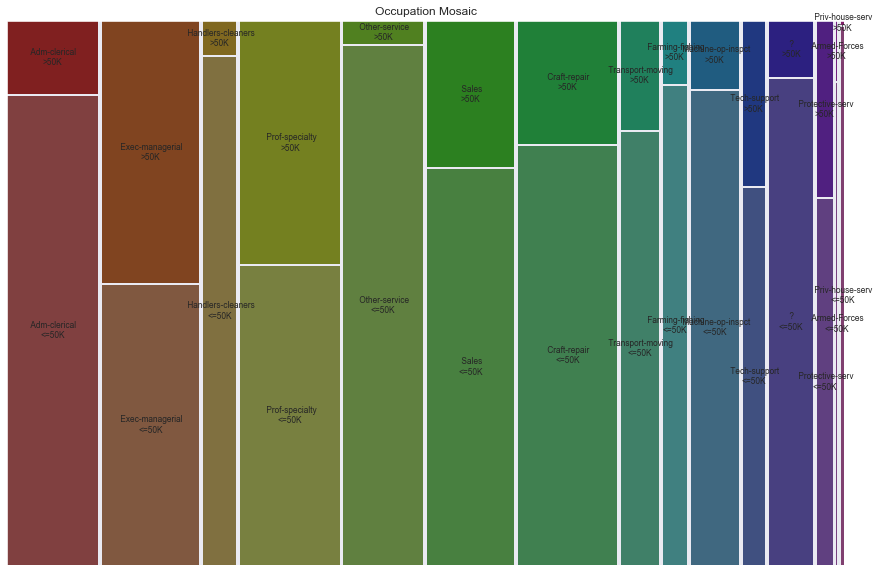

In [5]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
mosaic(df, ['occupation', 'salary-range'], ax=axes, axes_label=False)
plt.title("Occupation Mosaic")
plt.show()

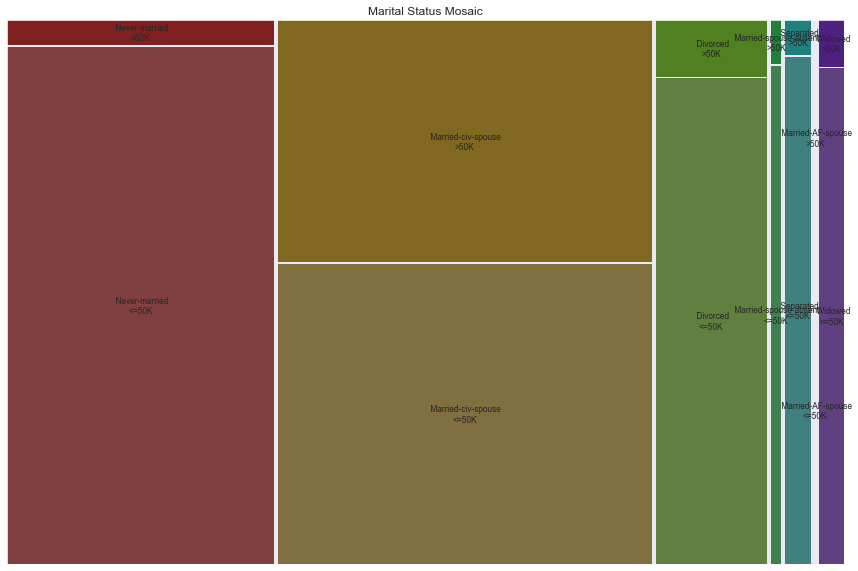

In [6]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
mosaic(df, ['marital_status', 'salary-range'], ax=axes, axes_label=False)
plt.title("Marital Status Mosaic")
plt.show()

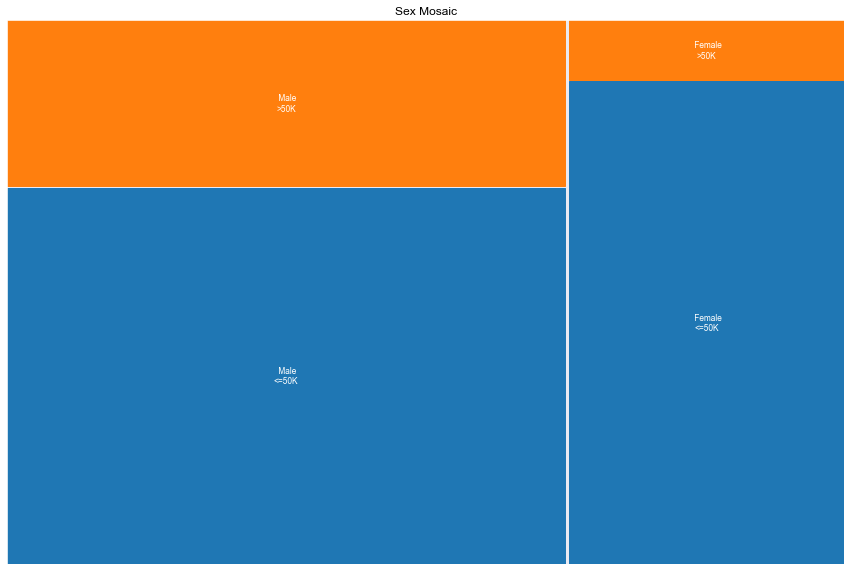

In [7]:
plt.rcParams.update({'text.color' : "white"})
props = lambda key: {'color': '#1f77b4' if '<=50K' in key else '#ff7f0e'}


fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
mosaic(df, ['sex', 'salary-range'], ax=axes, properties=props, axes_label=False)
plt.title("Sex Mosaic", color='black')
plt.show()

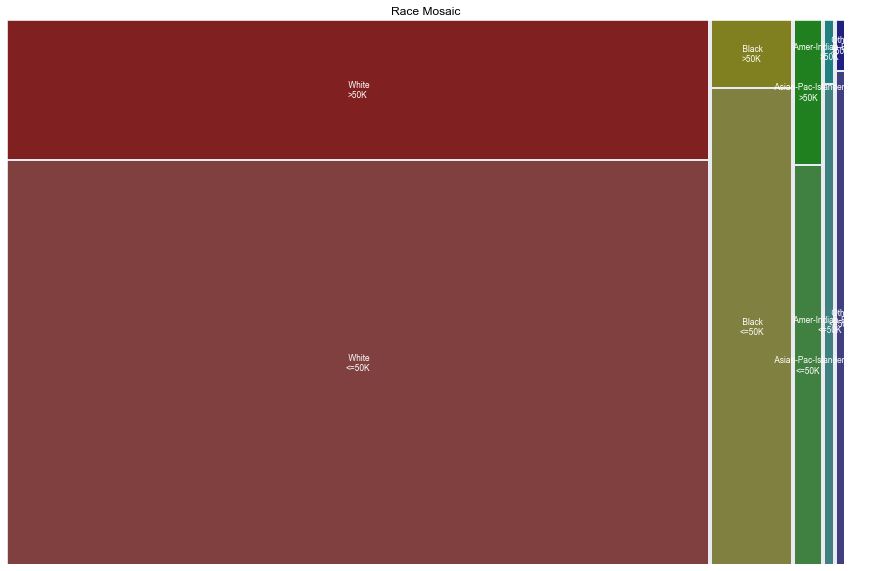

In [8]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
mosaic(df, ['race', 'salary-range'], ax=axes, axes_label=False)
plt.title("Race Mosaic", color='black')
plt.show()

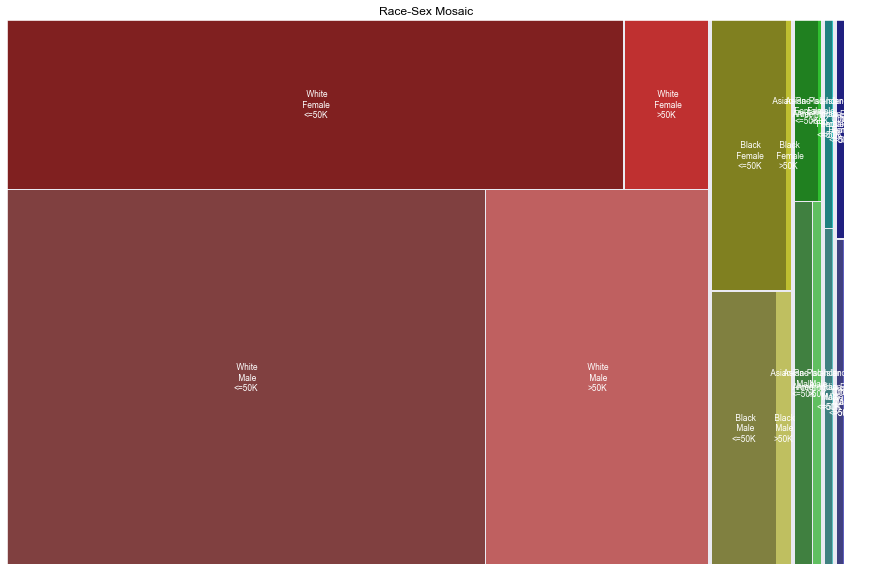

In [9]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
mosaic(df, ['race', 'sex', 'salary-range'], ax=axes, axes_label=False)
plt.title("Race-Sex Mosaic", color='black')
plt.show()

C:\Users\shawn\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  app.launch_new_instance()


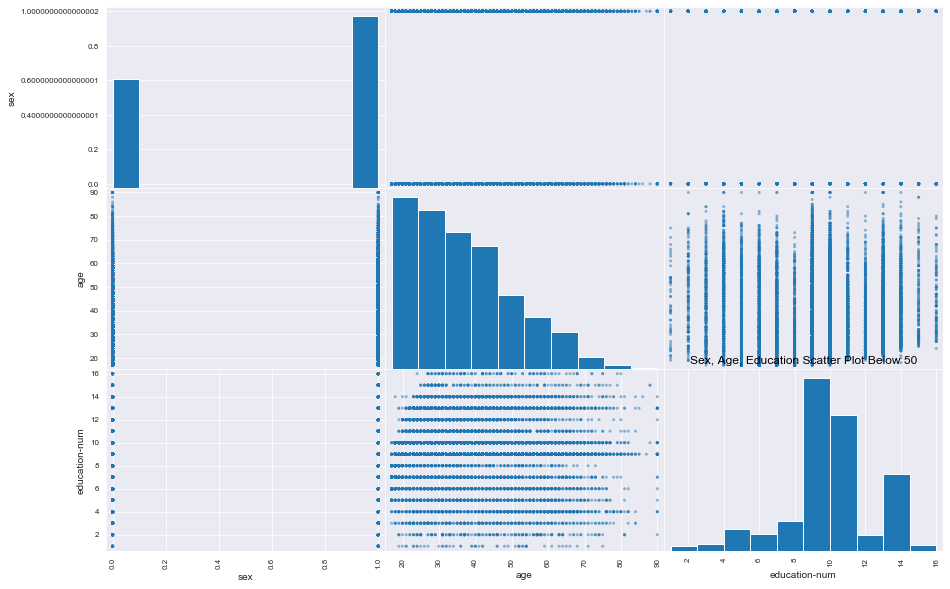

In [10]:
One = df['sex']
df['sex'] = df['sex'].apply(lambda s: 1 if s == df['sex'][0] else 0)
df['salary-range'] = df['salary-range'].apply(lambda s: 1 if s == '>50K' else 0)

below50 = df[df["salary-range"] == 0]
above50 = df[df["salary-range"] == 1]

dfBelow50 = below50[['sex', 'age', 'education-num']]
dfAbove50 = above50[['sex', 'age', 'education-num']]
# print(One)
# print(df['sex'])
# print(df['salary-range'])


fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
pd.plotting.scatter_matrix(dfBelow50, ax=axes)
plt.title("Sex, Age, Education Scatter Plot Below 50", color='black')
plt.show()

C:\Users\shawn\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


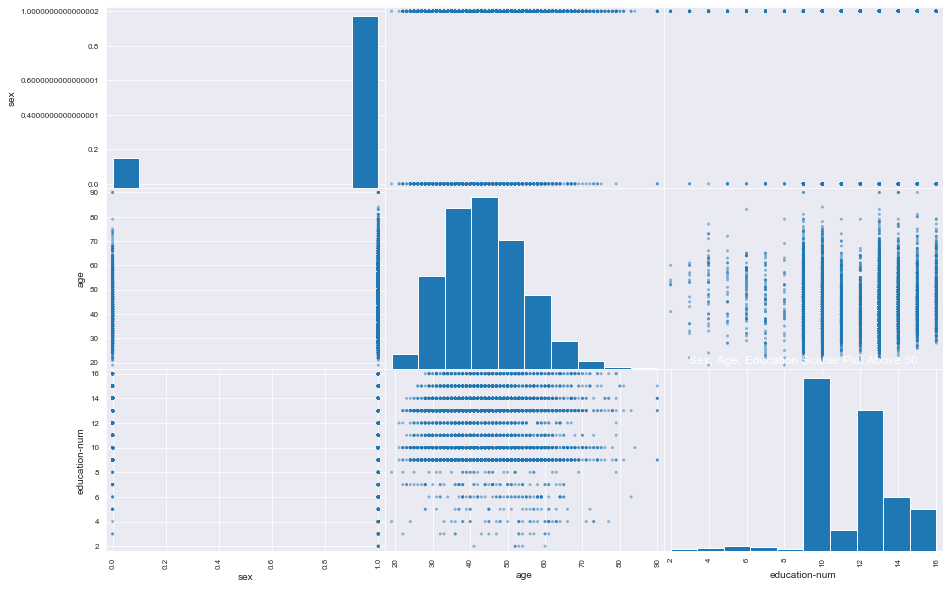

In [11]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
pd.plotting.scatter_matrix(dfAbove50, ax=axes)
plt.title("Sex, Age, Education Scatter Plot Above 50")
plt.show()

In [12]:
def pie_chart(category):
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(5,10))
    axes[0].pie(Counter(above50[category]).values(), labels=Counter(above50[category]).keys(), autopct='%1.0f%%')
    axes[1].pie(Counter(below50[category]).values(), labels=Counter(below50[category]).keys(), autopct='%1.0f%%')
    axes[0].set_title(">50K")
    axes[1].set_title("<=50K")
    
#     my_circle=plt.Circle( (0,0), 0.7, color='white')
#     p=plt.gcf()
#     p.gca().add_artist(my_circle)
    
    plt.show()
    
def sub_pieChart(subCategory):
    values_array = df[subCategory].unique()
    fig, axes = plt.subplots(ncols=1, nrows=len(values_array), figsize=(5,5 * len(values_array)))

    for i in range(0, len(values_array)):
        sub_df = df[df[subCategory] == values_array[i]]
        axes[i].pie([len(sub_df[sub_df["salary-range"] == 0].index), len(sub_df[sub_df["salary-range"] == 1].index)], \
                labels=["<=50K", ">50K"], autopct='%1.0f%%')
        axes[i].set_title(values_array[i])
        
        
    plt.show()

    


In [13]:
# pie_chart('marital_status')
#sub_pieChart('relationship')

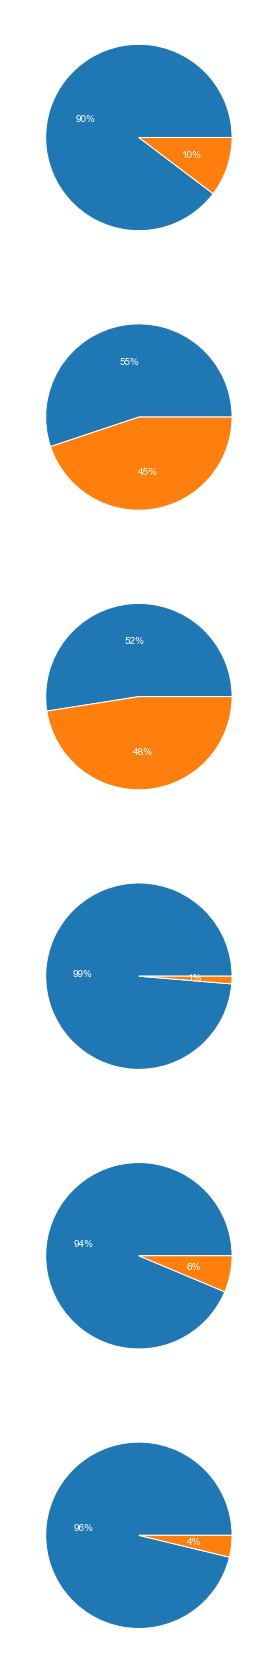

In [14]:
    values_array = df['relationship'].unique()
    fig, axes = plt.subplots(ncols=1, nrows=len(values_array), figsize=(5,5 * len(values_array)))

    for i in range(0, len(values_array)):
        sub_df = df[df['relationship'] == values_array[i]]
        axes[i].pie([len(sub_df[sub_df["salary-range"] == 0].index), len(sub_df[sub_df["salary-range"] == 1].index)], \
                labels=["<=50K", ">50K"], autopct='%1.0f%%')
        axes[i].set_title(values_array[i])
        
        
    plt.show()
